In [56]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# 1. Setează căile directoarelor
train_dir = "C:\\Users\\anton\\Desktop\\TIA\\Train"
val_dir = "C:\\Users\\anton\\Desktop\\TIA\\Validation"
test_dir = "C:\\Users\\anton\\Desktop\\TIA\\Test"
categories = os.listdir(train_dir)  # Se presupune că fiecare subfolder din train este o categorie

In [58]:
# 2. Funcție pentru încărcarea imaginilor și extragerea caracteristicilor
def load_images_and_features(directory, categories, image_size=(128, 128)):
    images = []
    labels = []
    image_paths = []
    for category in categories:
        category_path = os.path.join(directory, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Redimensionare imagine
                img_resized = cv2.resize(img, image_size)
                # Aplatizare imagine pentru a obține vectori de caracteristici
                features = img_resized.flatten()
                images.append(features)
                labels.append(category)
                image_paths.append(img_path)
    return np.array(images), labels, image_paths

In [59]:
# 3. Încarcă datele
X_train, y_train, train_paths = load_images_and_features(train_dir, categories)
X_val, y_val, val_paths = load_images_and_features(val_dir, categories)
X_test, y_test, test_paths = load_images_and_features(test_dir, categories)


In [65]:
# 4. Aplică KMeans pe datele de antrenare
num_clusters = len(categories)
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=15)
kmeans.fit(X_train)


KMeans(n_clusters=20, n_init=15, random_state=42)

In [67]:
# 5. Mapează clusterele la etichetele reale
label_encoder = LabelEncoder()
true_labels_train = label_encoder.fit_transform(y_train)

# Creează un dicționar pentru a asocia clusterele cu etichetele reale
cluster_to_label = {}
for cluster in range(num_clusters):
    indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_labels = [true_labels_train[i] for i in indices]
    if cluster_labels:
        cluster_to_label[cluster] = np.bincount(cluster_labels).argmax()

# Afișează asocierea clustere - etichete reale
print("Asociere clustere - etichete reale:")
for cluster, label in cluster_to_label.items():
    print(f"Cluster {cluster} -> Eticheta {label_encoder.inverse_transform([label])[0]}")

# Funcție pentru a transforma etichetele clusterelor în etichete reale
def predict_labels(X, kmeans, cluster_to_label):
    clusters = kmeans.predict(X)
    return np.array([cluster_to_label.get(cluster, -1) for cluster in clusters])

Asociere clustere - etichete reale:
Cluster 0 -> Eticheta elephant
Cluster 1 -> Eticheta lion
Cluster 2 -> Eticheta cow
Cluster 3 -> Eticheta bear
Cluster 4 -> Eticheta flamingo
Cluster 5 -> Eticheta tiger
Cluster 6 -> Eticheta panda
Cluster 7 -> Eticheta butterfly
Cluster 8 -> Eticheta deer
Cluster 9 -> Eticheta cat
Cluster 10 -> Eticheta sheep
Cluster 11 -> Eticheta panda
Cluster 12 -> Eticheta flamingo
Cluster 13 -> Eticheta turtle
Cluster 14 -> Eticheta cow
Cluster 15 -> Eticheta dolphin
Cluster 16 -> Eticheta penguin
Cluster 17 -> Eticheta horse
Cluster 18 -> Eticheta horse
Cluster 19 -> Eticheta zebra


In [68]:
# 6. Prezice etichetele pentru seturile de antrenare, validare și testare
y_train_pred = predict_labels(X_train, kmeans, cluster_to_label)
y_val_pred = predict_labels(X_val, kmeans, cluster_to_label)
y_test_pred = predict_labels(X_test, kmeans, cluster_to_label)


Performanță pe setul de antrenare:
              precision    recall  f1-score   support

        bear       0.24      0.22      0.23        60
   butterfly       0.19      0.17      0.18        60
         cat       0.16      0.12      0.13        60
         cow       0.15      0.30      0.20        60
        deer       0.22      0.33      0.26        60
         dog       0.00      0.00      0.00        60
     dolphin       0.78      0.23      0.36        60
    elephant       0.20      0.03      0.06        60
    flamingo       0.18      0.33      0.24        60
         fox       0.00      0.00      0.00        60
       horse       0.15      0.27      0.19        60
        lion       0.16      0.30      0.21        60
       panda       0.14      0.40      0.20        60
      parrot       0.00      0.00      0.00        60
     penguin       0.37      0.30      0.33        60
         pig       0.00      0.00      0.00        60
       sheep       0.13      0.20      0.16  

c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

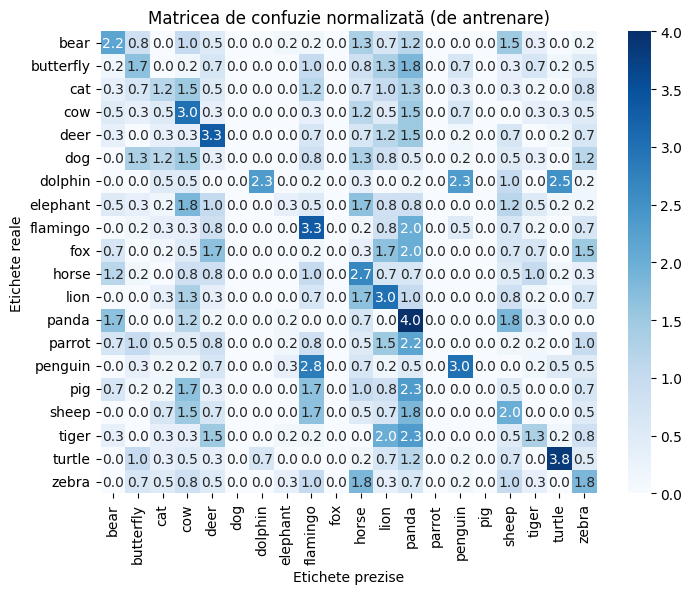


Performanță pe setul de validare:
              precision    recall  f1-score   support

        bear       0.25      0.24      0.24        25
   butterfly       0.15      0.16      0.15        25
         cat       0.15      0.12      0.13        25
         cow       0.11      0.20      0.14        25
        deer       0.29      0.40      0.34        25
         dog       0.00      0.00      0.00        25
     dolphin       0.83      0.20      0.32        25
    elephant       0.00      0.00      0.00        25
    flamingo       0.22      0.32      0.26        25
         fox       0.00      0.00      0.00        25
       horse       0.17      0.32      0.22        25
        lion       0.10      0.20      0.14        25
       panda       0.13      0.40      0.19        25
      parrot       0.00      0.00      0.00        25
     penguin       0.36      0.36      0.36        25
         pig       0.00      0.00      0.00        25
       sheep       0.18      0.20      0.19   

c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

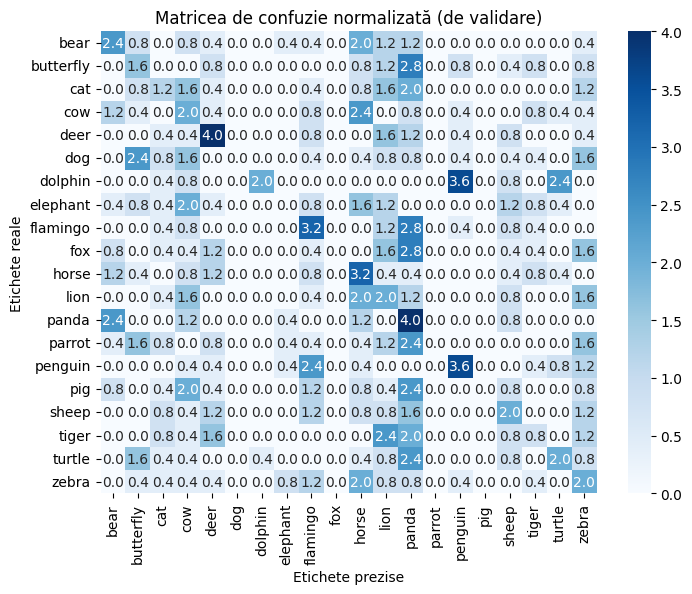


Performanță pe setul de testare:
              precision    recall  f1-score   support

        bear       0.42      0.33      0.37        15
   butterfly       0.25      0.13      0.17        15
         cat       0.18      0.13      0.15        15
         cow       0.11      0.27      0.15        15
        deer       0.21      0.33      0.26        15
         dog       0.00      0.00      0.00        15
     dolphin       0.00      0.00      0.00        15
    elephant       0.25      0.07      0.11        15
    flamingo       0.24      0.33      0.28        15
         fox       0.00      0.00      0.00        15
       horse       0.15      0.27      0.20        15
        lion       0.21      0.40      0.27        15
       panda       0.12      0.40      0.18        15
      parrot       0.00      0.00      0.00        15
     penguin       0.29      0.27      0.28        15
         pig       0.00      0.00      0.00        15
       sheep       0.19      0.20      0.19    

c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anton\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

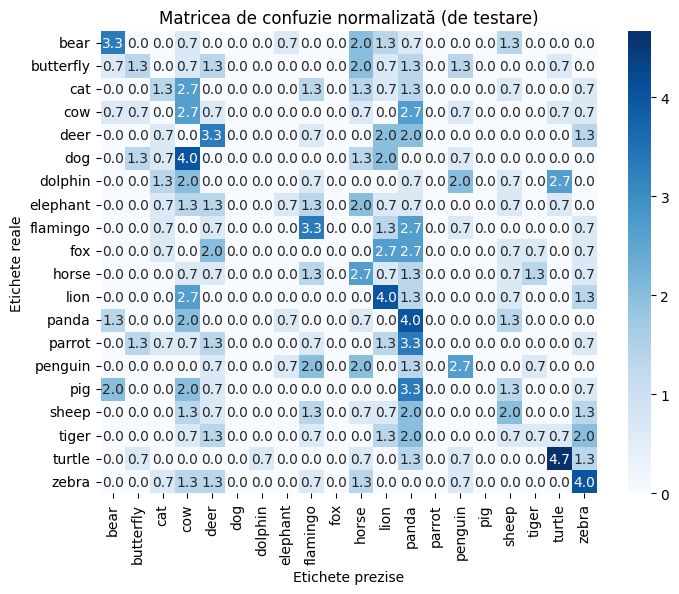

In [69]:
# 7. Calculează și afișează matricea de confuzie și indicatorii de performanță
def evaluate_performance(y_true, y_pred, title):
    print(f"\nPerformanță pe setul {title}:")
    print(classification_report(y_true, y_pred, target_names=categories))
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 10  # Normalizare la intervalul 0-10
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f"Matricea de confuzie normalizată ({title})")
    plt.xlabel("Etichete prezise")
    plt.ylabel("Etichete reale")
    plt.show()

# Evaluează performanța pe fiecare set
true_labels_val = label_encoder.transform(y_val)
true_labels_test = label_encoder.transform(y_test)

evaluate_performance(true_labels_train, y_train_pred, "de antrenare")
evaluate_performance(true_labels_val, y_val_pred, "de validare")
evaluate_performance(true_labels_test, y_test_pred, "de testare")

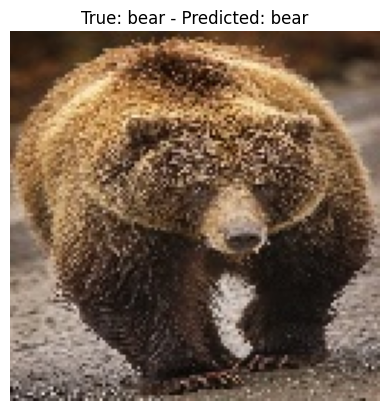

Probabilitățile pentru imaginea C:\Users\anton\Desktop\TIA\Test\bear\039b2ae790.jpg:
bear: 0.0483
butterfly: 0.0614
cat: 0.0574
cow: 0.0710
deer: 0.0269
dog: 0.0576
dolphin: 0.0537
elephant: 0.0361
flamingo: 0.0595
fox: 0.0505
horse: 0.0569
lion: 0.0643
panda: 0.0355
parrot: 0.0486
penguin: 0.0467
pig: 0.0348
sheep: 0.0383
tiger: 0.0563
turtle: 0.0525
zebra: 0.0438




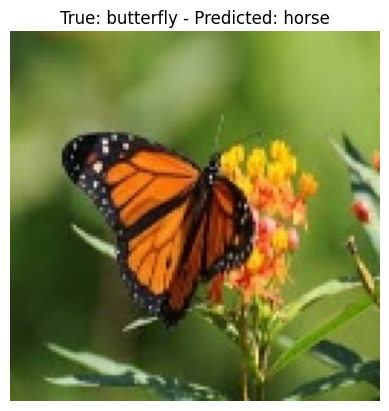

Probabilitățile pentru imaginea C:\Users\anton\Desktop\TIA\Test\butterfly\110f709dfb.jpg:
bear: 0.0438
butterfly: 0.0677
cat: 0.0544
cow: 0.0675
deer: 0.0259
dog: 0.0548
dolphin: 0.0533
elephant: 0.0347
flamingo: 0.0575
fox: 0.0477
horse: 0.0561
lion: 0.0681
panda: 0.0351
parrot: 0.0474
penguin: 0.0474
pig: 0.0333
sheep: 0.0369
tiger: 0.0716
turtle: 0.0527
zebra: 0.0439




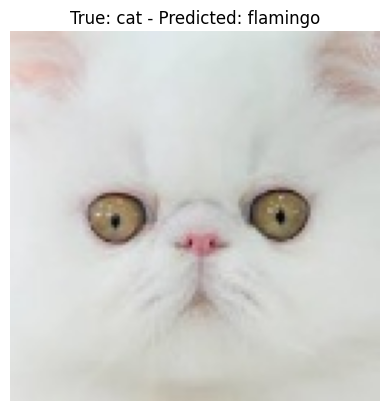

Probabilitățile pentru imaginea C:\Users\anton\Desktop\TIA\Test\cat\029c926ce9.jpg:
bear: 0.0431
butterfly: 0.0388
cat: 0.0401
cow: 0.0326
deer: 0.1242
dog: 0.0395
dolphin: 0.0253
elephant: 0.0750
flamingo: 0.0310
fox: 0.0436
horse: 0.0465
lion: 0.0338
panda: 0.0853
parrot: 0.0337
penguin: 0.0483
pig: 0.0375
sheep: 0.0736
tiger: 0.0357
turtle: 0.0470
zebra: 0.0653




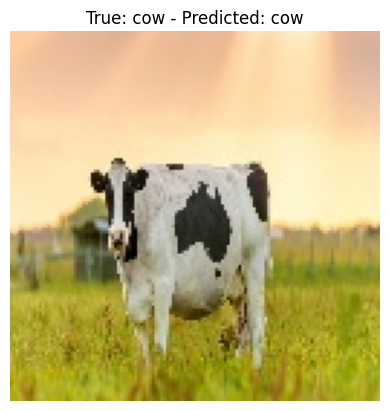

Probabilitățile pentru imaginea C:\Users\anton\Desktop\TIA\Test\cow\05768d38ec.jpg:
bear: 0.0514
butterfly: 0.0531
cat: 0.0534
cow: 0.0431
deer: 0.0456
dog: 0.0442
dolphin: 0.0324
elephant: 0.0544
flamingo: 0.0374
fox: 0.0457
horse: 0.0623
lion: 0.0453
panda: 0.0688
parrot: 0.0383
penguin: 0.0696
pig: 0.0354
sheep: 0.0536
tiger: 0.0507
turtle: 0.0523
zebra: 0.0632




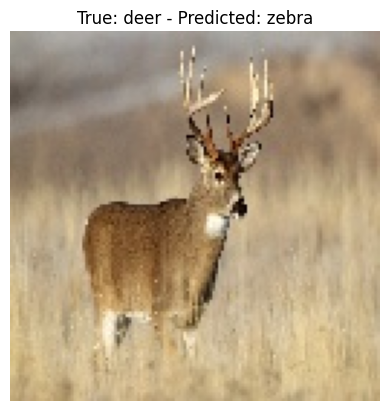

Probabilitățile pentru imaginea C:\Users\anton\Desktop\TIA\Test\deer\18eebf095c.jpg:
bear: 0.0441
butterfly: 0.0567
cat: 0.0448
cow: 0.0404
deer: 0.0374
dog: 0.0589
dolphin: 0.0278
elephant: 0.0575
flamingo: 0.0397
fox: 0.0591
horse: 0.0574
lion: 0.0417
panda: 0.0481
parrot: 0.0349
penguin: 0.0475
pig: 0.0300
sheep: 0.0561
tiger: 0.0449
turtle: 0.0800
zebra: 0.0929




In [70]:
# 8. Afișează imagini din setul de testare cu etichetele adevărate și prezise
def display_test_images_with_predictions(X_test, y_test, y_test_pred, test_paths, categories, num_images=5):
    displayed_categories = set()  # Urmărește categoriile deja afișate
    for i in range(len(test_paths)):
        if len(displayed_categories) >= num_images:
            break  # Oprește afișearea dacă s-au afișat suficiente categorii

        img_path = test_paths[i]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversie la RGB pentru a vizualiza corect

        true_label = y_test[i]
        predicted_label = label_encoder.inverse_transform([y_test_pred[i]])[0]

        # Afișează doar imagini din categorii diferite
        if true_label in displayed_categories:
            continue

        # Afișează imaginea și etichetele
        plt.imshow(img)
        plt.title(f"True: {true_label} - Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        # Adaugă categoria afișată
        displayed_categories.add(true_label)

        # Calculează probabilitățile pentru fiecare categorie (distanțele față de centrele clusterelor)
        distances = kmeans.transform([X_test[i]])  # Distanțele față de fiecare centru de cluster
        probabilities = 1 / (1 + distances)  # Transformă distanțele în probabilități (mai aproape = probabilitate mai mare)
        probabilities /= probabilities.sum()  # Normalizează pentru a obține probabilități

        # Afișează probabilitățile
        print(f"Probabilitățile pentru imaginea {img_path}:")
        for idx, category in enumerate(categories):
            print(f"{category}: {probabilities[0][idx]:.4f}")
        print("\n")

# Afișează imagini și probabilitățile pentru un număr de imagini din setul de testare
display_test_images_with_predictions(X_test, y_test, y_test_pred, test_paths, categories)